In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as stats
import torch
import sys
import pickle

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
data_path = '/global/cscratch1/sd/vboehm/SDSSOutlier/fc'

In [3]:
enc_train_new, enc_valid_new = np.load(os.path.join(data_path,'encoded_fc.npy'), allow_pickle=True)

In [4]:
RUN             = '1'
EPOCHS          = 40

seeds           = {'1':512, '2':879, '3':9981, '4': 20075, '5': 66, '6': 276, '7': 936664}

conditional     = False
cond_on         = 'type'

root_model_data = '/global/cscratch1/sd/vboehm/Datasets/sdss/by_model/'
root_models     = '/global/cscratch1/sd/vboehm/Models/SDSS_AE/'
root_encoded    = '/global/cscratch1/sd/vboehm/Datasets/encoded/sdss/'
root_decoded    = '/global/cscratch1/sd/vboehm/Datasets/decoded/sdss/'


wlmin, wlmax    = (3388,8318)
fixed_num_bins  = 1000
min_SN          = 50
min_z           = 0.05
max_z           = 0.36
label           = 'galaxies_quasars_bins%d_wl%d-%d'%(fixed_num_bins,wlmin,wlmax)
label_          = label+'_minz%s_maxz%s_minSN%d'%(str(int(min_z*100)).zfill(3),str(int(max_z*100)).zfill(3),min_SN)
label_2         = label_+'_10_fully_connected_mean_div'

plotpath        = '/global/homes/v/vboehm/codes/SDSS_PAE/figures'

if conditional:
    label_2='conditional_%s'%cond_on+label_2

In [5]:
encoded_train, encoded_valid, encoded_test = np.load(os.path.join(root_encoded,'encoded_%s_RUN%s_new.npy'%(label_2,RUN)), allow_pickle=True)

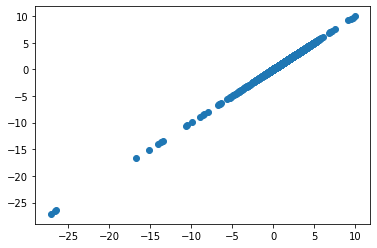

(1.0, 0.0)


In [13]:
plt.scatter(encoded_valid[0:10000,0],enc_valid_new[0:10000,0])
plt.show()
print(stats.pearsonr(encoded_valid[0:10000,0],enc_valid_new[0:10000,0]))

first AE encoding is the same

In [10]:
sys.path.append('/global/u2/v/vboehm/codes/SIG_GIS/')
from sig_gis import *
from sig_gis.GIS import *

In [11]:
model1 = torch.load(os.path.join(root_models,'conditional_SINF_%s_AE1'%(label_2)))
model2 = torch.load(os.path.join(data_path,'conditional_SINF_1'))

In [16]:
train_x = torch.Tensor(encoded_valid[0:10000]).to(device) 
train_y = torch.Tensor(np.zeros(10000)).to(torch.long).to(device)

valid_x = torch.Tensor(enc_valid_new[0:10000]).to(device) 
valid_y = torch.Tensor(np.zeros(10000)).to(torch.long).to(device)

In [20]:
logps_1 = model1.evaluate_density(train_x,train_y)

In [21]:
logps_2 = model2.evaluate_density(valid_x,valid_y)

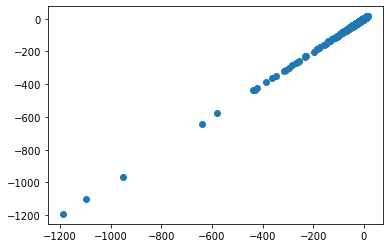

In [23]:
plt.scatter(logps_1.cpu().numpy(),logps_2.cpu().numpy())

In [25]:
stats.pearsonr(logps_1.cpu().numpy(),logps_2.cpu().numpy())

(0.9998760899829594, 0.0)

first density estimator is identical

In [35]:
train_new,valid_new = np.load(os.path.join(data_path,'decoded_fc.npy'), allow_pickle=True)

In [36]:
train, valid, test, mean, std = np.load(os.path.join(root_decoded,'decoded_%s_RUN%s_new.npy'%(label_2,RUN)), allow_pickle=True)

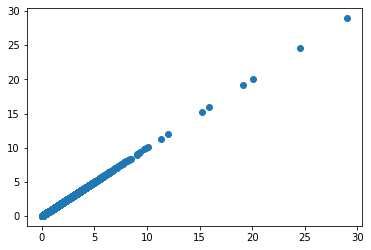

In [38]:
plt.scatter(train_new[0:10000,500],train[0:10000,500])

decoded distributions agree

In [29]:
encoded_train_new, encoded_valid_new = np.load(os.path.join(data_path,'encoded_AE2_RUN%s.npy'%(RUN)), allow_pickle=True)

In [30]:
encoded_train, encoded_valid, encoded_test = np.load(os.path.join(root_encoded,'encoded_AE2_%s_RUN%s.npy'%(label_2,RUN)), allow_pickle=True)

In [39]:
encoded_train_new2, encoded_valid_new2 = np.load(os.path.join(data_path,'encoded_AE2_RUN%s_2.npy'%(RUN)),allow_pickle=True)

In [33]:
print(os.path.join(root_encoded,'encoded_AE2_%s_RUN%s.npy'%(label_2,RUN)))

/global/cscratch1/sd/vboehm/Datasets/encoded/sdss/encoded_AE2_galaxies_quasars_bins1000_wl3388-8318_minz005_maxz036_minSN50_10_fully_connected_mean_div_RUN1.npy


training of second AE gives different results each time

(0.6554683048717387, 0.0)


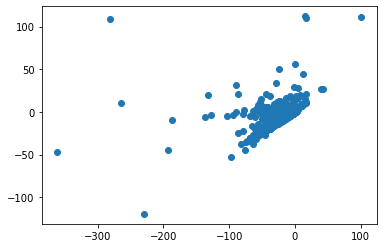

In [32]:
plt.scatter(encoded_train[0:10000,0],encoded_train_new[0:10000,0])
print(stats.pearsonr(encoded_train[0:10000,0],encoded_train_new[0:10000,0]))

(0.5423018379944858, 0.0)


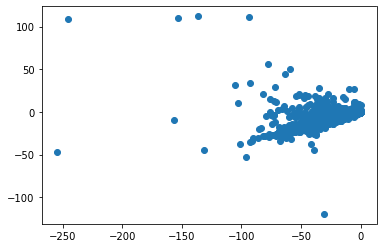

In [40]:
plt.scatter(encoded_train_new2[0:10000,0],encoded_train_new[0:10000,0])
print(stats.pearsonr(encoded_train_new2[0:10000,0],encoded_train_new[0:10000,0]))

(0.8962454191809843, 0.0)


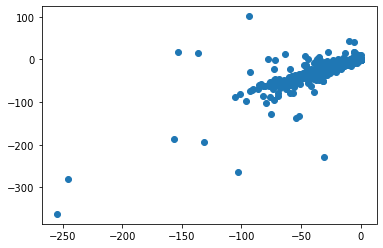

In [41]:
plt.scatter(encoded_train_new2[0:10000,0],encoded_train[0:10000,0])
print(stats.pearsonr(encoded_train_new2[0:10000,0],encoded_train[0:10000,0]))

In [ ]:
#torch.save(model,os.path.join(root_models,'conditional_SINF_%s_%s_%d_inpainted_data'%(label_2,upsampling,fac)))

In [45]:
model1=torch.load(os.path.join(root_models,'conditional_SINF_%s_inpainted_denoised_data_relabeled'%(label_2)))

In [48]:
model2=torch.load(os.path.join(data_path,'conditional_SINF_AE2_1'))

In [56]:
model3=torch.load(os.path.join(data_path,'conditional_SINF_AE22_1'))

In [91]:
train_x = torch.Tensor(encoded_valid).to(device) 
#train_y = torch.Tensor(np.zeros(10000)).to(torch.long).to(device)

valid_x = torch.Tensor(encoded_valid_new).to(device) 
#valid_y = torch.Tensor(np.zeros(10000)).to(torch.long).to(device)

test_x = torch.Tensor(encoded_valid_new2).to(device) 
#test_y = torch.Tensor(np.zeros(10000)).to(torch.long).to(device)

In [58]:
logps_1 = model1.evaluate_density(train_x,train_y)

In [59]:
logps_2 = model2.evaluate_density(valid_x,valid_y)

In [60]:
logps_3 = model3.evaluate_density(test_x,test_y)

(0.9757975898472542, 0.0)

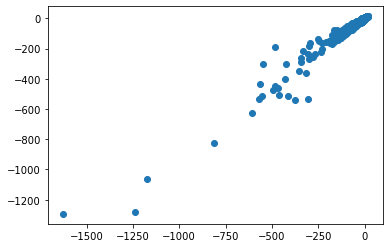

In [61]:
plt.scatter(logps_1.cpu().numpy(),logps_2.cpu().numpy())
stats.pearsonr(logps_1.cpu().numpy(),logps_2.cpu().numpy())

(0.9784739509922736, 0.0)

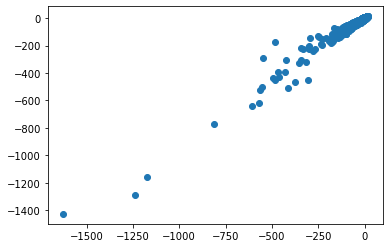

In [62]:
plt.scatter(logps_1.cpu().numpy(),logps_3.cpu().numpy())
stats.pearsonr(logps_1.cpu().numpy(),logps_3.cpu().numpy())

In [169]:
labels = []
res = []
for data, model in zip([train_x,valid_x,test_x],[model1,model2,model3]):
    px = np.zeros((16,len(data)))
    for ii in range(16):
        px[ii]        = model.evaluate_density(data,ii*torch.ones((len(data))).to(device)).cpu().numpy()
    labels_new        = np.argmax(px,axis=0)
    logps             = px
    labels+=[labels_new]
    res+=[logps]

In [170]:
weights = np.asarray([1,0,0])#[np.exp(np.mean(logps[0])),np.exp(np.mean(logps[1])),np.exp(np.mean(logps[2]))]/(np.exp(np.mean(logps[0]))+np.exp(np.mean(logps[1]))+np.exp(np.mean(logps[2])))

In [171]:
labels = np.argmax(np.sum(np.vstack([res[0],res[1][:,:69820],res[2][:,:69820]]).reshape((3,16,69820))*weights[:,None,None],axis=0),axis=0)

In [172]:
px = np.sum(np.vstack([res[0],res[1][:,:69820],res[2][:,:69820]]).reshape((3,16,69820))*weights[:,None,None],axis=0)

In [173]:
px = px[labels,np.arange(len(labels))]

In [174]:
np.save(os.path.join(data_path)+'weighted_mean_logp.npy',px)

In [175]:
np.save(os.path.join(data_path)+'weighted_mean_labels.npy',labels)

In [176]:
train,valid,test,le = pickle.load(open(os.path.join(root_model_data,'combined_%s_new.pkl'%label_),'rb'))

/global/homes/v/vboehm/.conda/envs/pytorch/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [177]:
df_valid   = pd.DataFrame.from_dict(dict((k,valid[k]) for k in ('MJD','fiber','plate','z') if k in valid))

In [178]:
df_valid['logp'] = px
df_valid['label']= labels

In [179]:
def split_in_equal_bins(data, num_bins, sort_by, logp, num):
    ppb  = len(data)//num_bins
    data = data.sort_values(sort_by)
    bin_edges = [0]
    outliers  = []
    for ii in range(num_bins):
        dd = data.iloc[ii*ppb:(ii+1)*ppb]
        bin_edges.append(dd[sort_by].iloc[-1])
        dd = dd.sort_values(logp)
        outliers.append(dd.iloc[0:num])
    return bin_edges, outliers

In [180]:
bin_edges, ood = split_in_equal_bins(df_valid[df_valid['label']==0], num_bins=10, sort_by='z', logp='logp', num=20)

In [181]:
decoded_train, decoded = np.load(os.path.join(data_path,'decoded_fc.npy'), allow_pickle=True)

In [184]:
df_train = pd.read_csv(os.path.join('/global/cscratch1/sd/vboehm/SDSSOutlier/results/','training_set.csv'))
df_valid = pd.read_csv(os.path.join('/global/cscratch1/sd/vboehm/SDSSOutlier/results/','validation_set.csv'))
df_test  = pd.read_csv(os.path.join('/global/cscratch1/sd/vboehm/SDSSOutlier/results/','test_set.csv'))

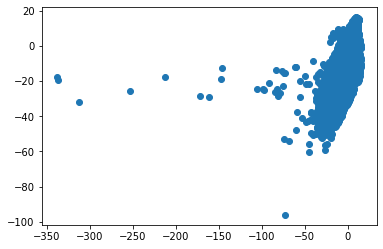

In [188]:
plt.scatter(df_valid['logp'],px)

In [182]:
valid_1=valid

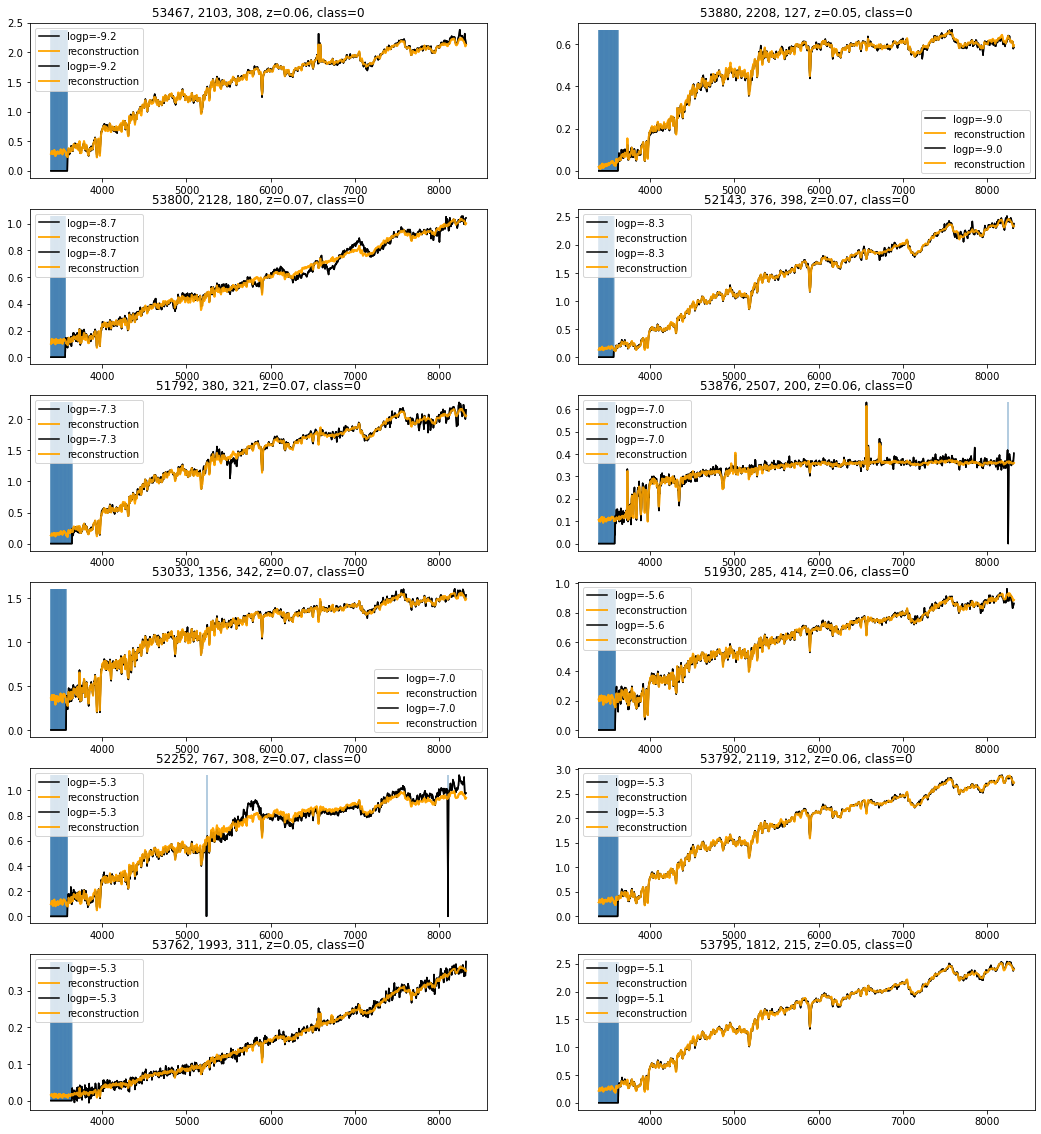

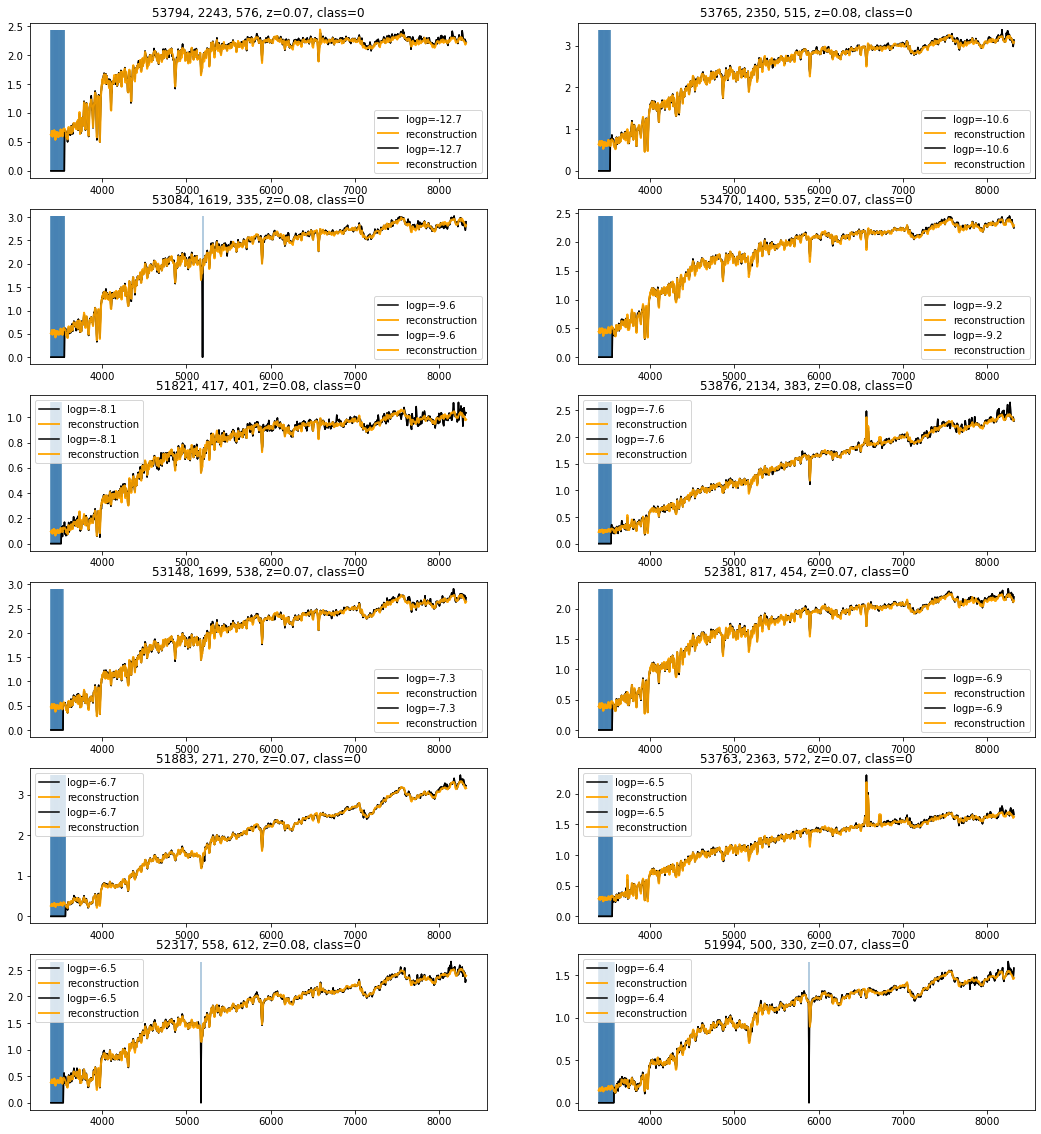

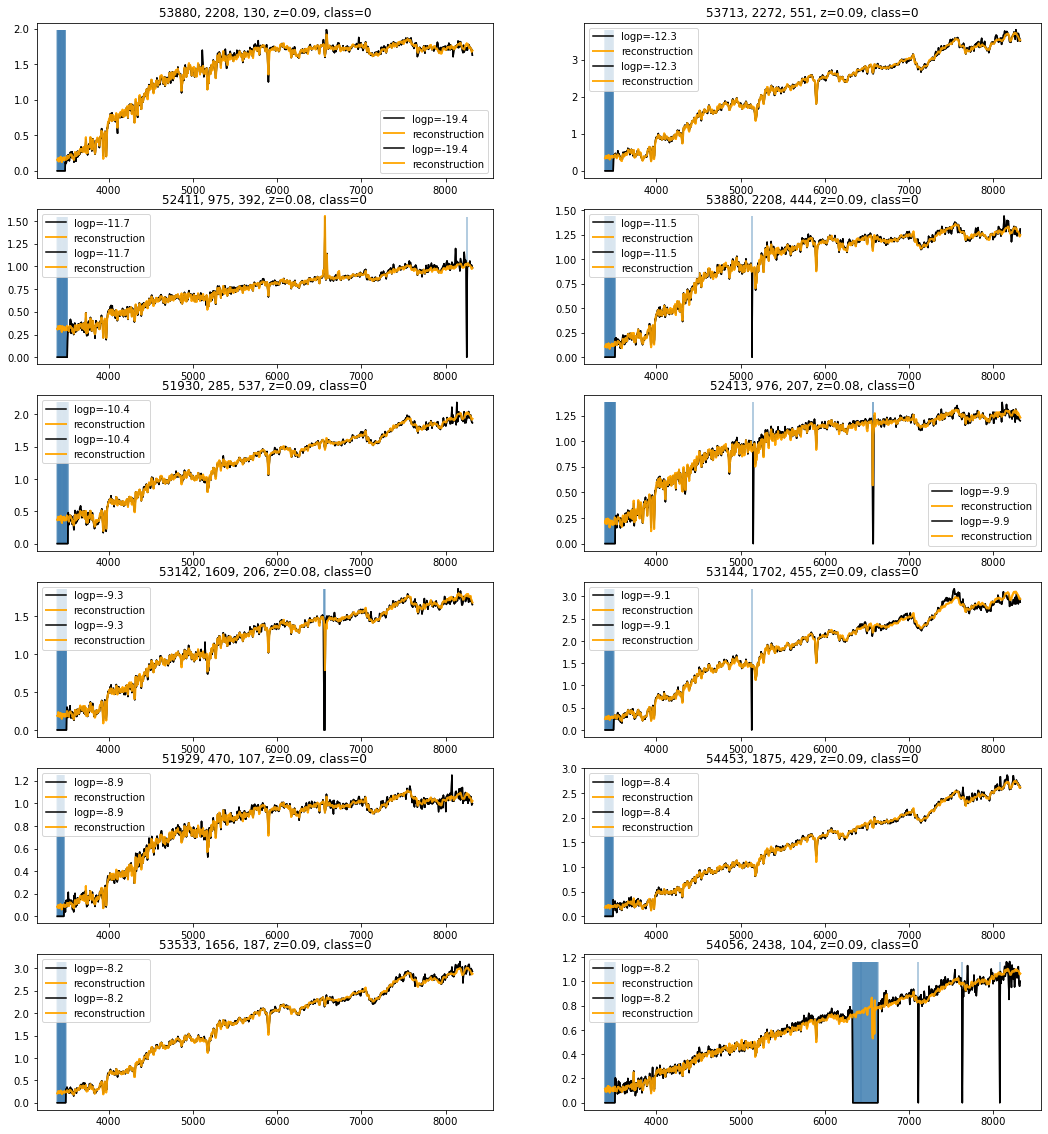

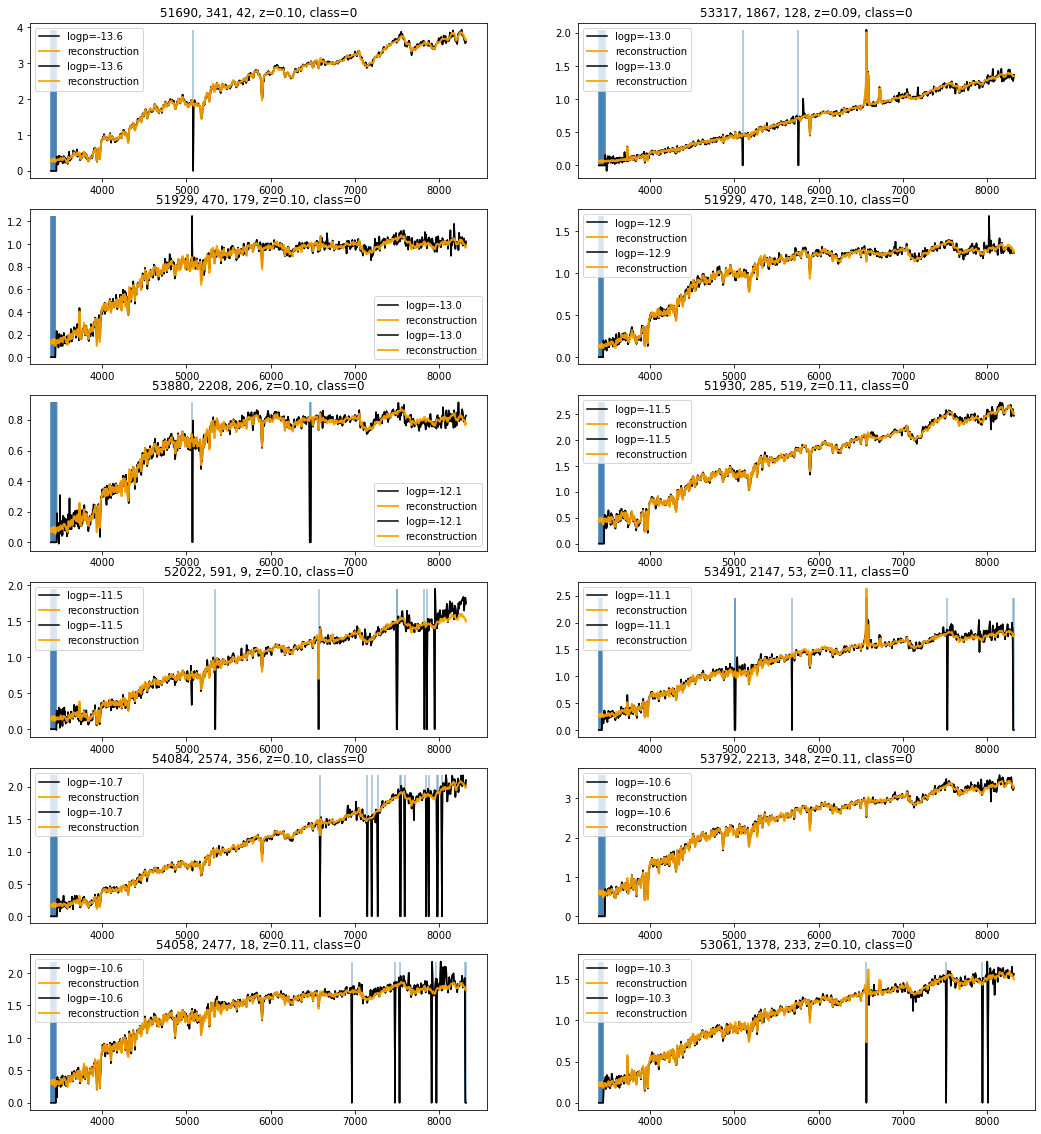

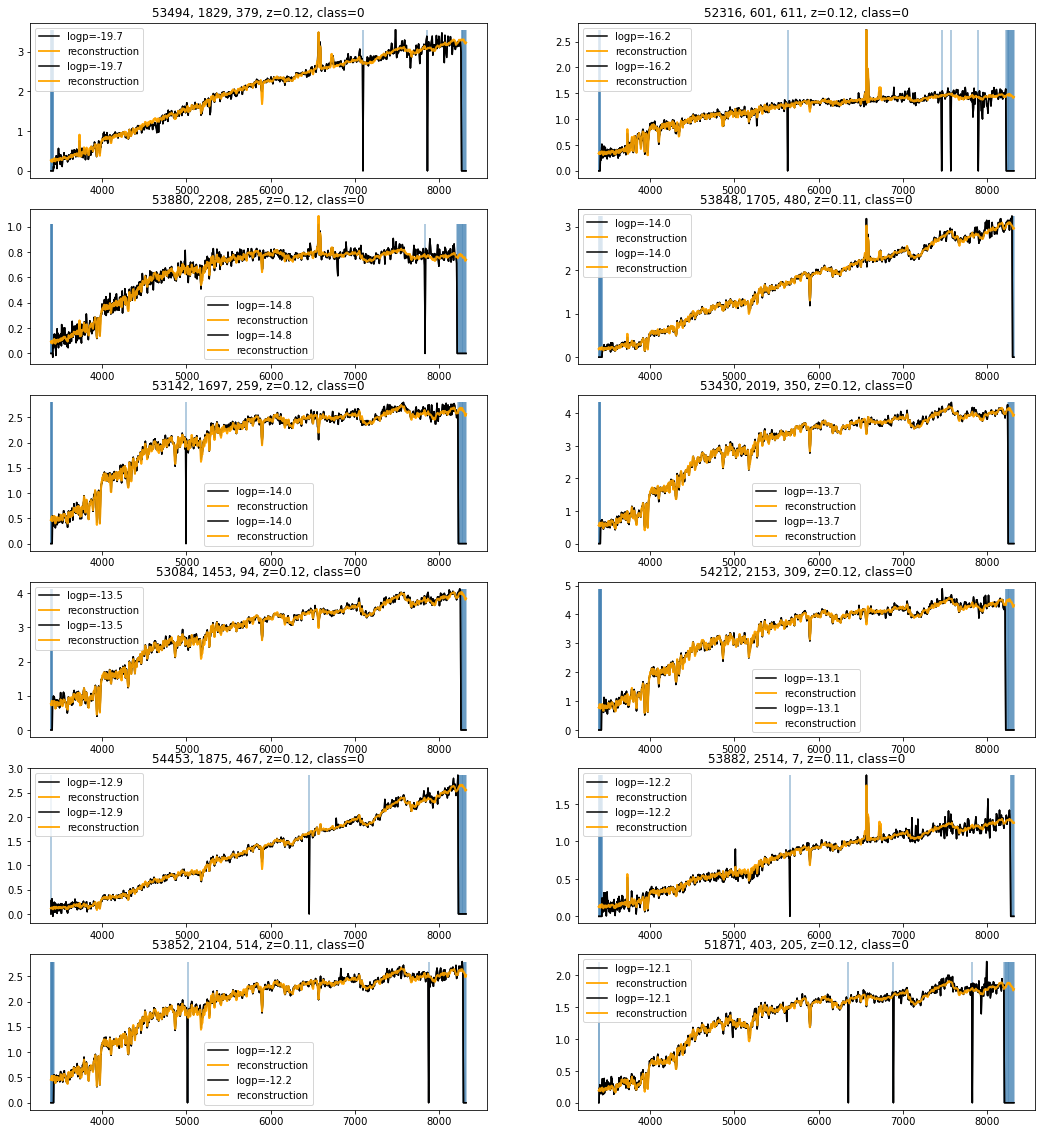

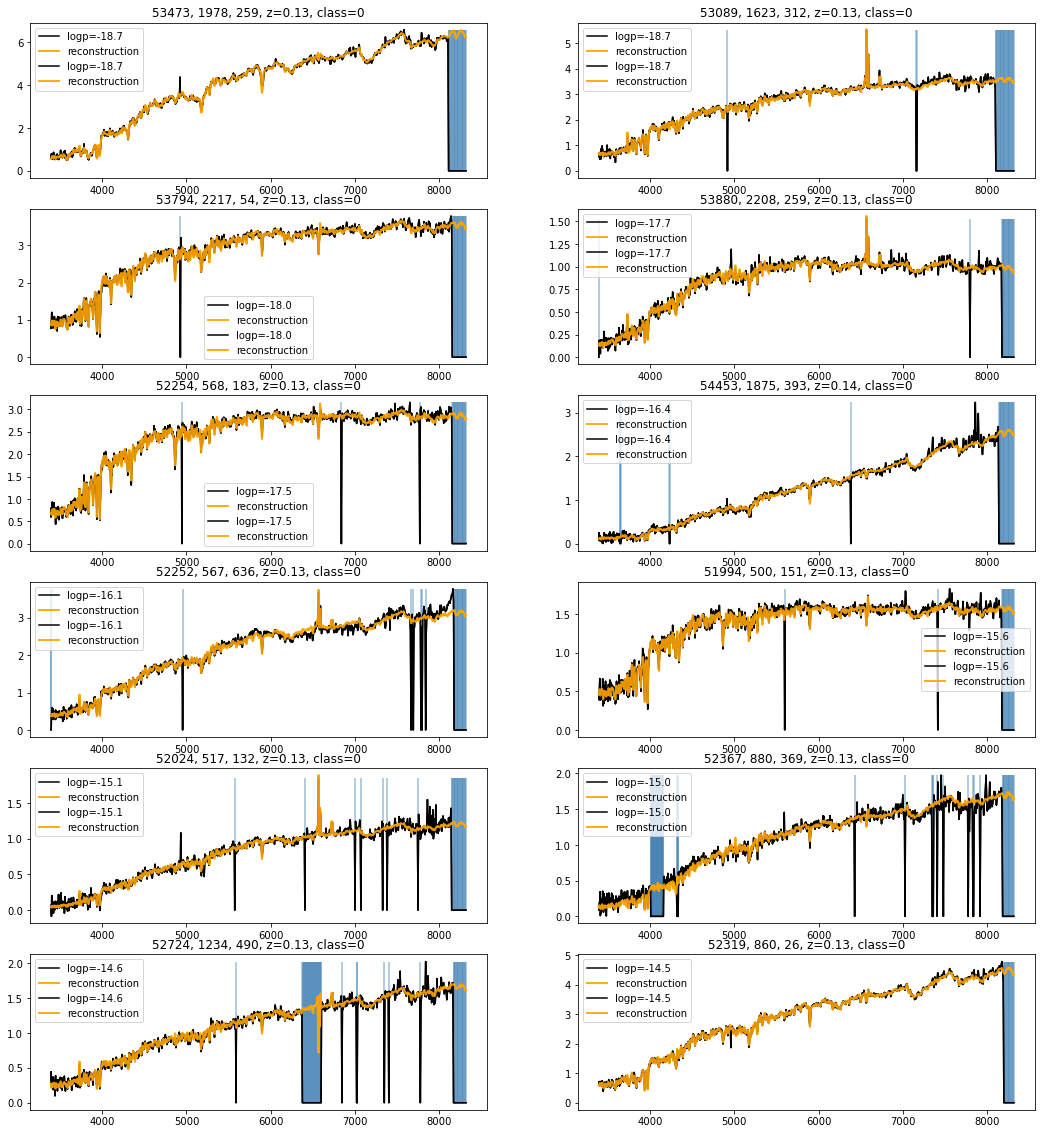

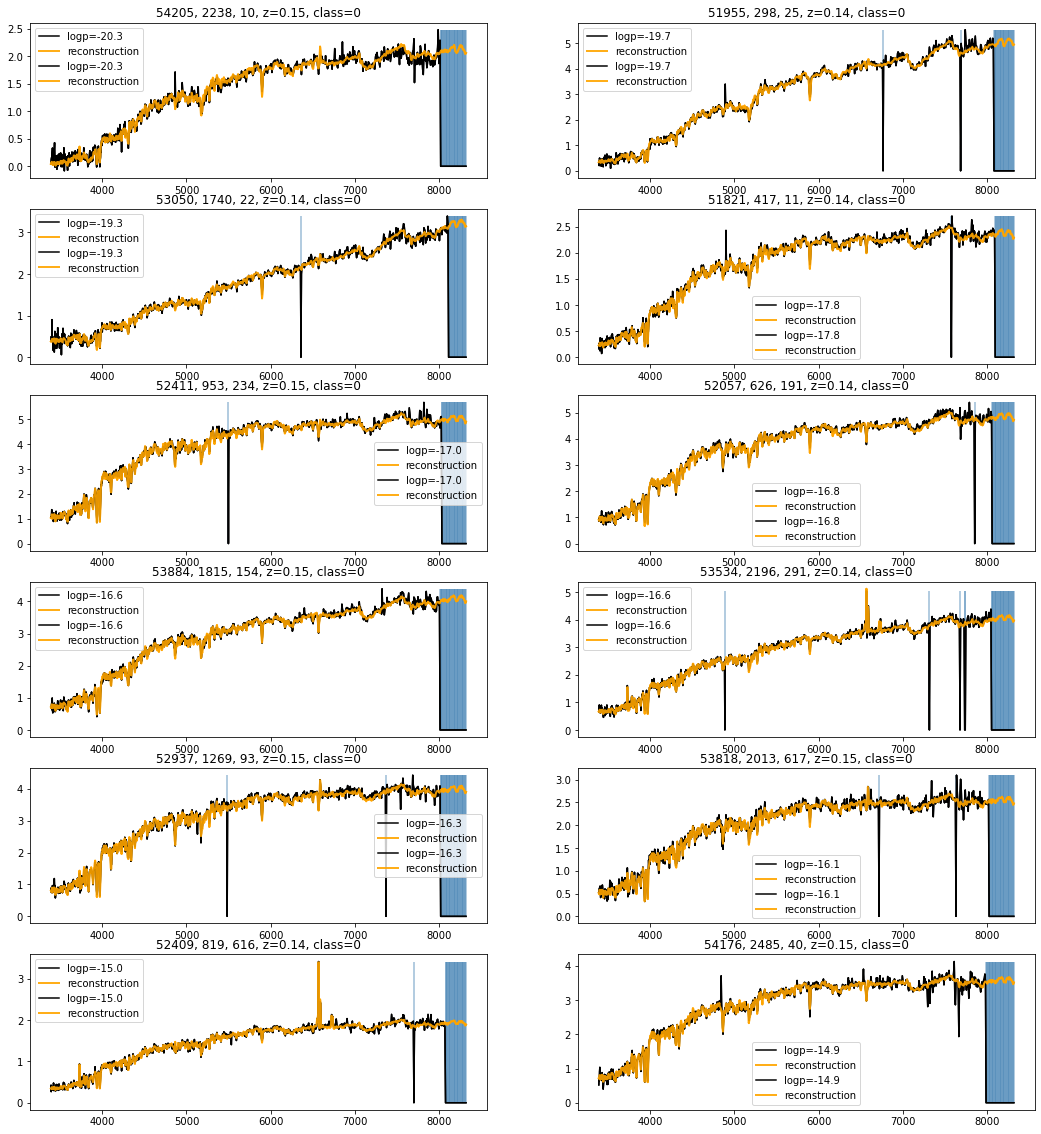

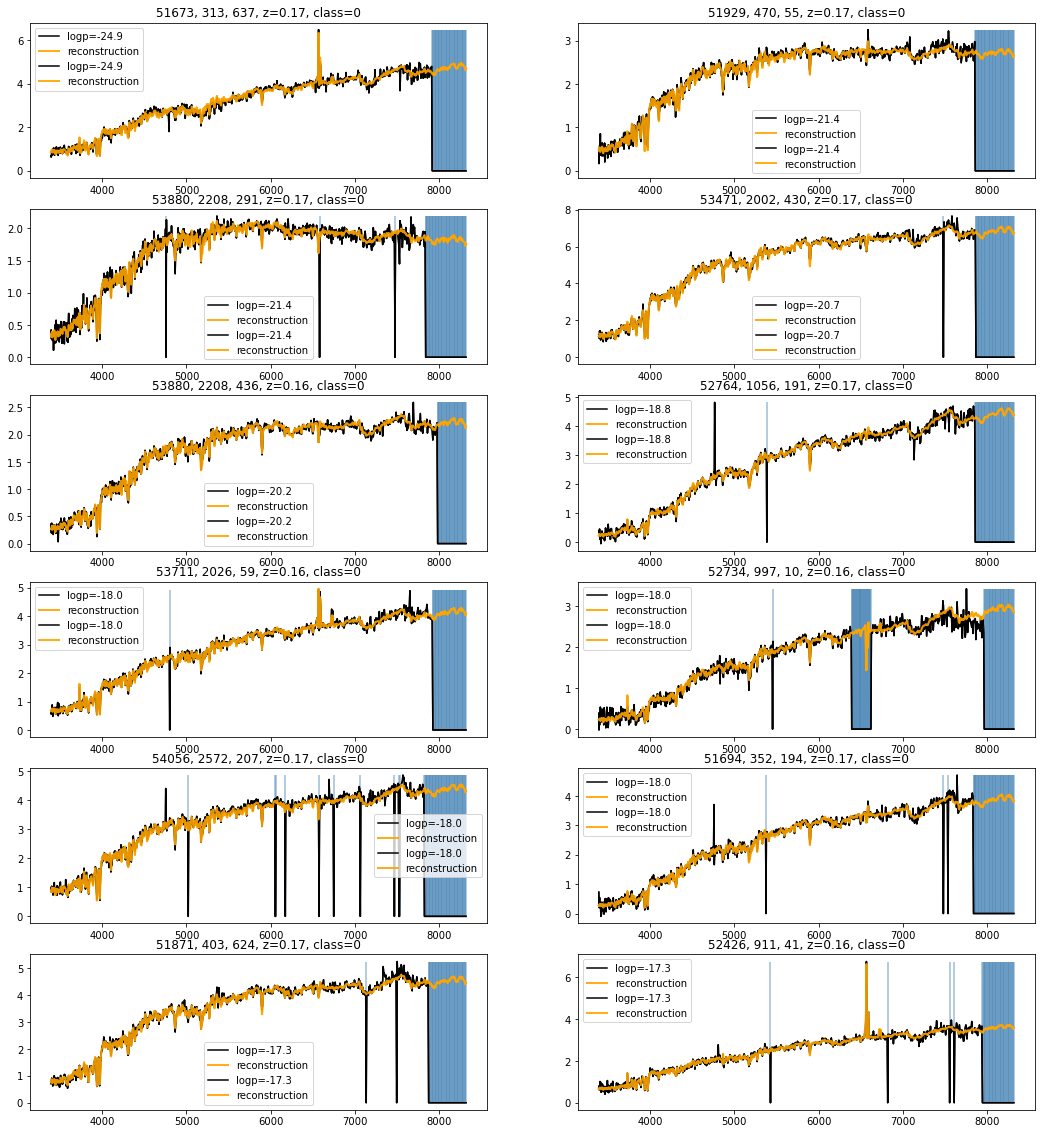

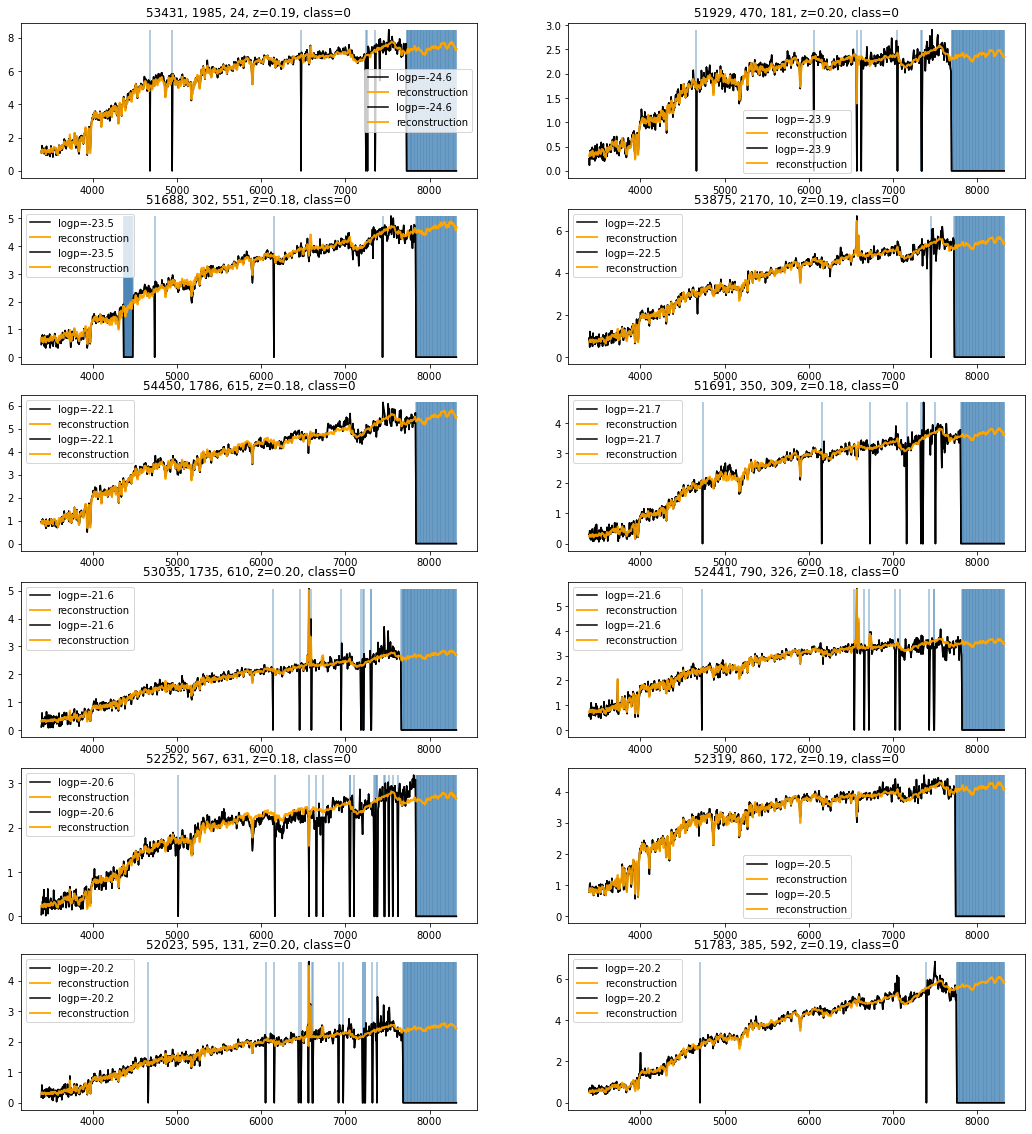

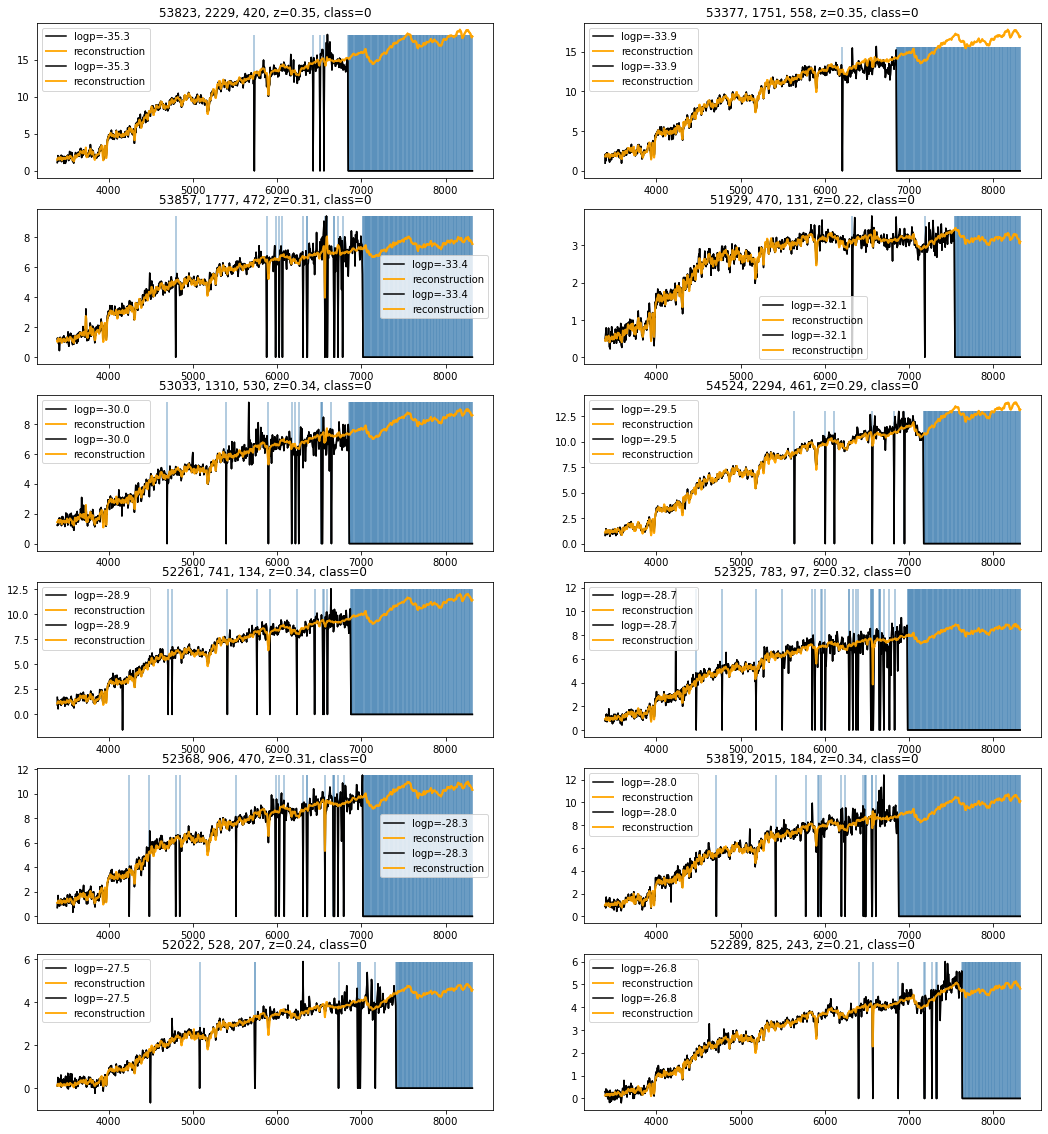

In [183]:
wlmin, wlmax      = (3388,8318)
fixed_num_bins    = 1000
wl_range          = (np.log10(wlmin),np.log10(wlmax))
new_wl            = np.logspace(wl_range[0],wl_range[1],fixed_num_bins+1)

for nn, data in enumerate(ood):
    fi, ax = plt.subplots(6,2,figsize=(18,20))
    ax  = ax.flatten()
    ind = data.index
    for jj in range(12):
        ii = ind[jj]
        ax[jj].set_title('%d, %d, %d, z=%.2f, class=%d'%(data['MJD'].loc[ii],data['plate'].loc[ii],data['fiber'].loc[ii],data['z'].loc[ii],data['label'].loc[ii]))
        ax[jj].plot(new_wl[1:],valid_1['spec'][ii], color='black',label='logp=%.1f'%data['logp'].loc[ii])
        ax[jj].vlines(x=new_wl[1:][np.squeeze(~valid_1['mask'][ii].astype(bool))], ymin=0,ymax=max(valid_1['spec'][ii]), color='steelblue',alpha=0.3)
        ax[jj].plot(new_wl[1:],decoded[ii], label='reconstruction',ls='-', color='orange', lw=2,alpha=0.9)

        ax[jj].legend()
    ind = data.index
    for jj in range(12):
        ii = ind[jj]
        ax[jj].set_title('%d, %d, %d, z=%.2f, class=%d'%(data['MJD'].loc[ii],data['plate'].loc[ii],data['fiber'].loc[ii],data['z'].loc[ii],data['label'].loc[ii]))
        ax[jj].plot(new_wl[1:],valid_1['spec'][ii], color='black',label='logp=%.1f'%data['logp'].loc[ii])
        ax[jj].vlines(x=new_wl[1:][np.squeeze(~valid_1['mask'][ii].astype(bool))], ymin=0,ymax=max(valid_1['spec'][ii]), color='steelblue',alpha=0.3)
        ax[jj].plot(new_wl[1:],decoded[ii], label='reconstruction',ls='-', color='orange', lw=2,alpha=0.9)

        ax[jj].legend()
#     if ii in [10,11]:
#         ax[ii].set_xlabel(r'restframe $\lambda$ [nm]')
#     if ii%2==0:
#         ax[ii].set_ylabel(r'standardized flux')        
# plt.tight_layout()
    plotpath='/global/cscratch1/sd/vboehm/SDSSOutlier/fc/plots'
    #plt.savefig(os.path.join(plotpath,'logp_AE2_outliers_class0_zbin_%d.pdf'%nn), bbox_inches='tight')
    plt.show()

In [152]:
ind = np.argsort(px)

ind = ind[np.where(labels[ind]==0)]

53823


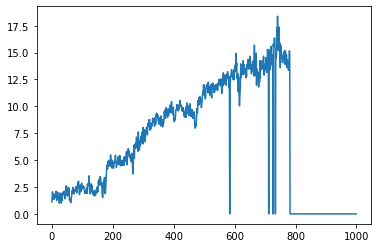

53377


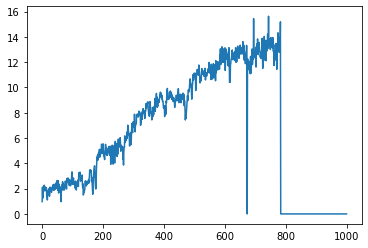

53857


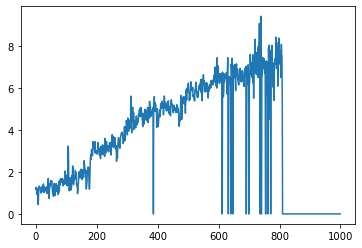

51929


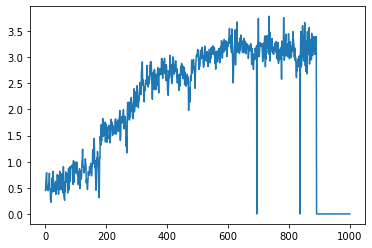

52163


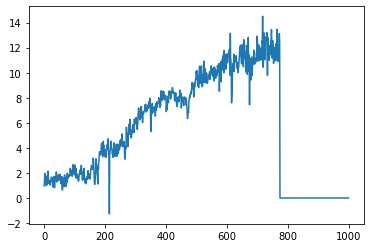

In [154]:
for ii in ind[0:5]:
    print(valid['MJD'][ii])
    plt.plot(valid['spec'][ii])
    plt.show()